In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [5]:
(X_train, Y_train),(X_test,Y_test)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [6]:
X_train.shape,Y_train.shape, X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

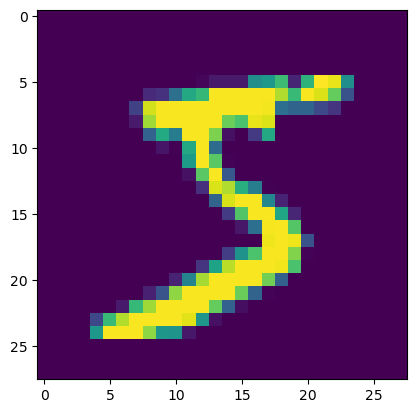

In [7]:
print(Y_train[0])
print(X_train[0])


import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [8]:
X_train = X_train/255
X_test = X_test/255


In [22]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(12,activation = 'relu' ))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [23]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 12)                9420      
                                                                 
 dense_25 (Dense)            (None, 8)                 104       
                                                                 
 dense_26 (Dense)            (None, 10)                90        
                                                                 
Total params: 9,614
Trainable params: 9,614
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])
history = model.fit(X_train,Y_train, validation_split= 0.2 , epochs = 10  )

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6393 - accuracy: 0.8114 - val_loss: 0.3672 - val_accuracy: 0.8957
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3502 - accuracy: 0.9005 - val_loss: 0.3029 - val_accuracy: 0.9143
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2976 - accuracy: 0.9157 - val_loss: 0.2834 - val_accuracy: 0.9197
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2694 - accuracy: 0.9253 - val_loss: 0.2566 - val_accuracy: 0.9283
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2499 - accuracy: 0.9299 - val_loss: 0.2580 - val_accuracy: 0.9273
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2327 - accuracy: 0.9349 - val_loss: 0.2288 - val_accuracy: 0.9358
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2184 - accuracy: 0.9390 - val_loss: 0.2185 - val_accuracy:

In [25]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis = 1)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

313/313 [==============================] - 0s 1ms/step


0.947

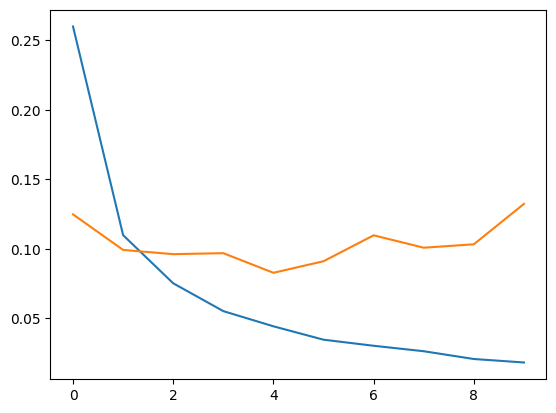

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

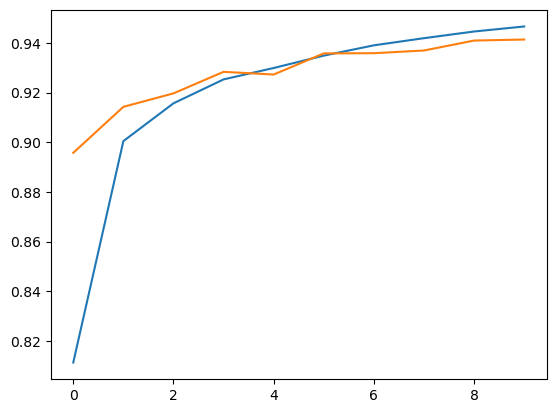

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])